# Example: Functional Connectivity in Python 

This code:
    1) Imports test EEG data
    2) Calculated the wPLI, dPLI, and AEC

## Description

This demonstrates the repository's implementations of dPLI, wPLI, and AEC. These methods were initially developed as internal MATLAB tools, and these Python translations were developed and validated against the original MATLAB methods. 

The methods are unified in an object-oriented framework for connectivity estimation. This notebook shows how to use these objects to compute connectivity matrices from a sample dataset. These matrices are also visualized with varying degrees of surrogate correction.


## Imports

In [1]:
import mne

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from src.BIAPT_Connectivity import connectivity_compute

## Loading Subject Data

The desired subject and task can be specified here. The test data uses an ID of "test" and a task of "Base".

In [2]:
ID = "test"
task = "Base"

In [3]:
path_epochs = "testdata/sub-{}/eeg/epochs_{}_{}.fif".format(ID,ID,task)
epochs = mne.read_epochs(path_epochs)
epochs = epochs.drop_channels(epochs.info['bads'])

Reading c:\code\work\biapt\Python_Connectivity\testdata\sub-test\eeg\epochs_test_Base.fif ...
    Found the data of interest:
        t =       0.00 ...    9996.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_25104/1342681711.py:2: RuntimeWarning: This filename (testdata/sub-test/eeg/epochs_test_Base.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(path_epochs)


This data has already been segmented into 10s windows. However, the connectivity estimation can actually take continuous data and perform the segmentation internally. As such, we will contatenate this data into a single time-series first.

In [4]:
raw_data = np.concatenate(list(epochs), axis=1)

## Setting Parameters

The connectivity estimation requires the specification of the data sampling rate, the desired frequency band, and the desired window length/step size.

In [5]:
sfreq = int(epochs.info['sfreq'])

In [6]:
# define parameters: 
l_freq = 7
h_freq = 13
window_length = 10
step_size = 10


## Connectivity Estimation

Now we're ready to compute our connectivity matrices. For each method, we'll compute a connectivity matrix with 0, 20, and 50 surrogates. We'll begin with wPLI.

### wPLI

In [7]:
# No surrogates
wpli = connectivity_compute(raw_data, window_length, step_size, l_freq,
                            h_freq, sfreq, n_surrogates=0, mode="wpli",
                            verbose=False)

# 20 surrogates
wpli_surrogates_20 = connectivity_compute(raw_data, window_length, step_size, l_freq,
                                          h_freq, sfreq, n_surrogates=20, mode="wpli",
                                          verbose=False)
                                          
# 50 surrogates
wpli_surrogates_50 = connectivity_compute(raw_data, window_length,step_size, l_freq,
                                          h_freq, sfreq, n_surrogates=50, mode="wpli",
                                          verbose=False)

C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [8]:
print(wpli.shape)

(29, 105, 105)


These methods return one connectivity matrix for each epoch. This data contains 29 epochs, and thus there are 29 connectivity matrices returned.

For visualization, we average across all epochs.

Text(0.5, 1.0, 'WPLI with 50 Surrogates')

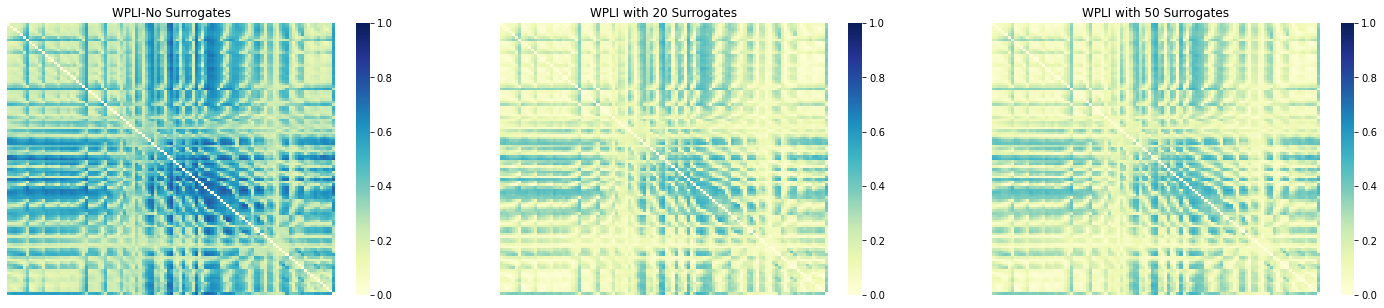

In [9]:
# Average across epochs
average_wpli = np.mean(wpli, axis=0)
average_wpli_surrogates_20= np.mean(wpli_surrogates_20, axis=0)
average_wpli_surrogates_50= np.mean(wpli_surrogates_50, axis=0)

# Data visualization
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
for ax in axs:
    ax.set_axis_off()

sns.heatmap(average_wpli, cmap='YlGnBu', ax=axs[0], vmin=0, vmax=1)
axs[0].set_title("WPLI-No Surrogates")

sns.heatmap(average_wpli_surrogates_20, cmap='YlGnBu', ax=axs[1], vmin=0, vmax=1)
axs[1].set_title("WPLI with 20 Surrogates")

sns.heatmap(average_wpli_surrogates_50, cmap='YlGnBu', ax=axs[2], vmin=0, vmax=1)
axs[2].set_title("WPLI with 50 Surrogates")

### dPLI

In [10]:
# No surrogates
dpli = connectivity_compute(raw_data, window_length, step_size, l_freq,
                            h_freq, sfreq, n_surrogates=0, mode="dpli",
                            verbose=False)
                            
# 20 surrogates
dpli_surrogates_20 = connectivity_compute(raw_data, window_length, step_size, l_freq,
                                          h_freq, sfreq, n_surrogates=20, mode="dpli",
                                          verbose=False)

# 50 surrogates
dpli_surrogates_50 = connectivity_compute(raw_data, window_length, step_size, l_freq,
                                          h_freq, sfreq, n_surrogates=50, mode="dpli",
                                          verbose=False)

Text(0.5, 1.0, 'dPLI with 50 Surrogates')

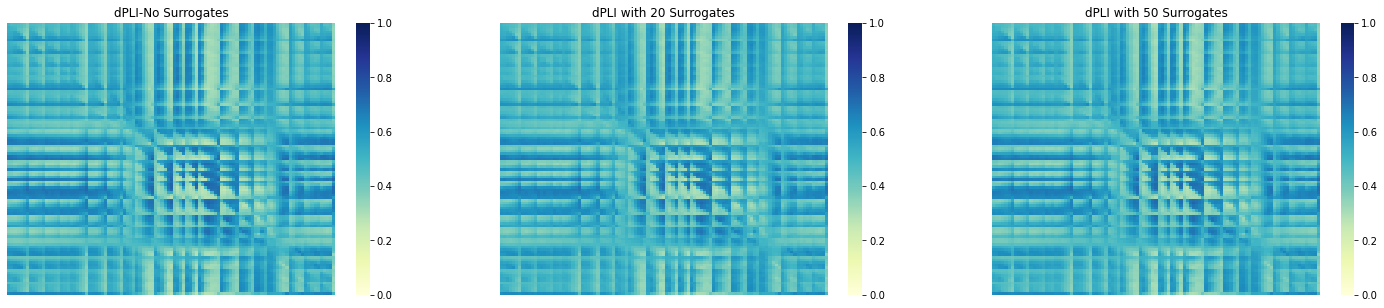

In [11]:
# Average across epochs
average_dpli = np.mean(dpli, axis=0)
average_dpli_surrogates_20= np.mean(dpli_surrogates_20, axis=0)
average_dpli_surrogates_50= np.mean(dpli_surrogates_50, axis=0)

# Data visualization
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
for ax in axs:
    ax.set_axis_off()

sns.heatmap(average_dpli, cmap='YlGnBu', ax=axs[0], vmin=0, vmax=1)
axs[0].set_title("dPLI-No Surrogates")

sns.heatmap(average_dpli_surrogates_20, cmap='YlGnBu', ax=axs[1], vmin=0, vmax=1)
axs[1].set_title("dPLI with 20 Surrogates")

sns.heatmap(average_dpli_surrogates_50, cmap='YlGnBu', ax=axs[2], vmin=0, vmax=1)
axs[2].set_title("dPLI with 50 Surrogates")

### AEC

For AEC, there is no surrogate correction.

Text(0.5, 1.0, 'AEC')

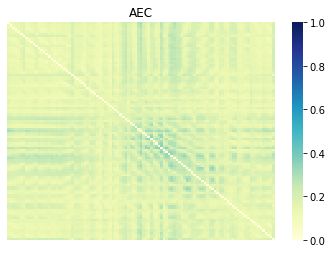

In [12]:
aec = connectivity_compute(raw_data, window_length, step_size, l_freq,
                           h_freq, sfreq, n_surrogates=0, mode="aec",
                           verbose=False)

# Average across epochs
average_aec = np.mean(aec, axis=0)

# Data visualization
plt.figure()
ax = sns.heatmap(average_aec, cmap='YlGnBu',ax=None, vmin=0, vmax=1)
ax.set_xticks([])
ax.set_yticks([])
plt.title("AEC")